In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import erf, sqrt

# Kickstarter 
## Understanding the successes and failures

In this project I wanted to find out more about how the distribution of funding in Kickstater looked like. The Data is downloaded from Kaggle (https://www.kaggle.com/kemical/kickstarter-projects) and from 2018.
This is my first individual project.

1. What is the distribution of the ratio of the goal pledged to the projects.
2. How does the probability of a succesfully crowdfunding your project differ between categories?
3. In what category and at what funding goal are the probabilities of success the highest?

In [2]:
kick=pd.read_csv('ks-projects-201801.csv')
df=kick.copy()

In [3]:
df.head(20)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


## What is the distribution of the ratio of the goal to the amount pledged.

In [4]:
df['ratio']=df['pledged']/df['goal']

<AxesSubplot:xlabel='ratio'>

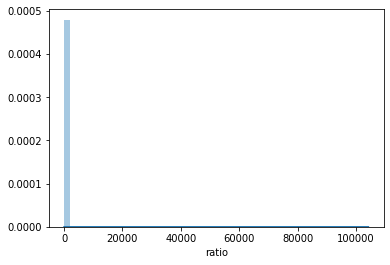

In [5]:
sns.distplot(df['ratio'])

In [6]:
mu=df['ratio'].mean()
print(mu)
me=df['ratio'].median()
print(me)
sd=df['ratio'].std()
print(sd)

3.235920942669484
0.13464
266.8985927940698


It is clear from these numbers that there are some outliers that make it hard to read the data. 

In [7]:
df.loc[(df['ratio'] > 2)] = 2

<AxesSubplot:xlabel='ratio'>

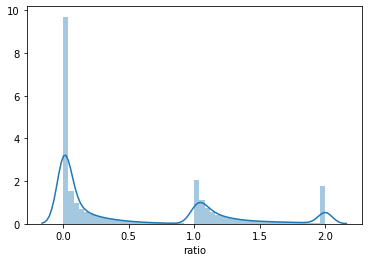

In [8]:
sns.distplot(df['ratio'])

Now we can see that the changes above doesnt change our data that much. There are two peaks (and one artificial one). One around 0 and one around 1.

Lets take a close look at the peak at 1 and see if we can get some insight.

In [9]:
df_win=df.loc[(df['ratio'] >= 1) & (df['ratio']< 2)]


<AxesSubplot:xlabel='ratio'>

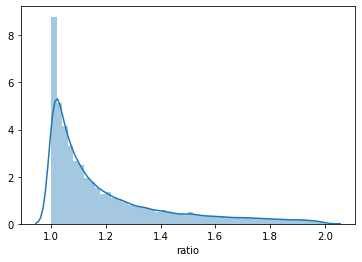

In [10]:
sns.distplot(df_win['ratio'])

So, this is not the complete picture, but due to the way this data is distributed, looking at only this part can inform us about the likelihood of pledging money beyond the set goal. So lets find out a bit about the distribution given that you have been successful in funding your project.

The following code to calculate the area under the graph I got from Peter Kazarinoff https://pythonforundergradengineers.com/probability-under-normal-curve-with-python.html

In [11]:
mu = df_win['ratio'].mean()
sigma = df_win['ratio'].std()  
x1 = mu-sigma  
x2 = mu+sigma

In [12]:
double_prob = erf( (x1-mu) / (sigma*sqrt(2)) )
p_lower = double_prob/2
print(f'\n Lower Bound: {round(p_lower,4)}')

double_prob = erf( (x2-mu) / (sigma*sqrt(2)) )
p_upper = double_prob/2
print(f'\n Upper Bound: {round(p_upper,4)}')


 Lower Bound: -0.3413

 Upper Bound: 0.3413


In [13]:
Pin = (p_upper) - (p_lower)

print('\n')
print(f'mean = {mu}    std dev = {sigma} \n')
print(f'Calculating the probability of occurring between {x1} <--> {x2} \n')
print(f'inside interval Pin = {round(Pin*100,1)}%')
print(f'outside interval Pout = {round((1-Pin)*100,1)}% \n')
print('\n')



mean = 1.196739437205356    std dev = 0.22569053110075335 

Calculating the probability of occurring between 0.9710489061046026 <--> 1.4224299683061092 

inside interval Pin = 68.3%
outside interval Pout = 31.7% 





So, here we can see that the average ratio of funding for successful projects is around 1.197 with a standard deviation of around 0.226.  68.4% of the successful projects fall into one std from the mean. 31.7% are even luckier and get even better. 


Regarding the data on the extreme that I have so far ignored. 

In [14]:
df2=kick.copy()

In [15]:
df2['ratio']=df2['pledged']/df2['goal']

In [16]:
df_xlwin=df2.loc[(df2['ratio'] >= 2) & (df2['ratio']< 10)]


<AxesSubplot:xlabel='ratio'>

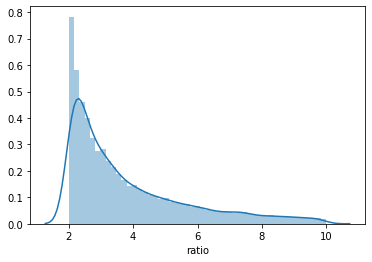

In [17]:
sns.distplot(df_xlwin['ratio'])

In [18]:
mu = df_xlwin['ratio'].mean()
sigma = df_xlwin['ratio'].std()  
x1 = 2   
x2 = mu+2*sigma

In [19]:
double_prob = erf( (x1-mu) / (sigma*sqrt(2)) )
p_lower = double_prob/2
print(f'\n Lower Bound: {round(p_lower,4)}')

double_prob = erf( (x2-mu) / (sigma*sqrt(2)) )
p_upper = double_prob/2
print(f'\n Upper Bound: {round(p_upper,4)}')


 Lower Bound: -0.3334

 Upper Bound: 0.4772


In [20]:
Pin = (p_upper) - (p_lower)

print('\n')
print(f'mean = {mu}    std dev = {sigma} \n')
print(f'Calculating the probability of occurring between {x1} <--> {x2} \n')
print(f'inside interval Pin = {round(Pin*100,1)}%')
print(f'outside interval Pout = {round((1-Pin)*100,1)}% \n')
print('\n')



mean = 3.810955569897237    std dev = 1.8713589668363342 

Calculating the probability of occurring between 2 <--> 7.553673503569906 

inside interval Pin = 81.1%
outside interval Pout = 18.9% 





## Task 2: What is the probability of success in each category?

Here, I will see if the probability of success differ between categories. 

In [21]:
df3=kick.copy()

In [22]:
df3.drop(columns=['category'],inplace=True)


In [23]:
df3=df3.rename(columns={"main_category": "category"})


In [24]:
df_category=df3.groupby('category'
).ID.count().reset_index()
df_category=df_category.rename(columns={'ID':'total'})
df_category

,category,total
0,Art,28153
1,Comics,10819
2,Crafts,8809
3,Dance,3768
4,Design,30070
5,Fashion,22816
6,Film & Video,63585
7,Food,24602
8,Games,35231
9,Journalism,4755


In [25]:
win_cat=df3[df3['state'].isin(['successful'])
][['category','ID']
].groupby('category'
).count().rename(columns={'ID':'success'}).reset_index()
win_cat

,category,success
0,Art,11510
1,Comics,5842
2,Crafts,2115
3,Dance,2338
4,Design,10550
5,Fashion,5593
6,Film & Video,23623
7,Food,6085
8,Games,12518
9,Journalism,1012


In [26]:
fail_cat=df3[~df3['state'].isin(['successful'])
][['category','ID']
].groupby('category'
).count().rename(columns={'ID':'fail'}).reset_index()
fail_cat

,category,fail
0,Art,16643
1,Comics,4977
2,Crafts,6694
3,Dance,1430
4,Design,19520
5,Fashion,17223
6,Film & Video,39962
7,Food,18517
8,Games,22713
9,Journalism,3743


In [27]:
df_category=pd.merge(df_category, win_cat, how='inner', on='category',sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [28]:
df_category=pd.merge(df_category, fail_cat, how='inner', on='category',sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [29]:
df_category

,category,total,success,fail
0,Art,28153,11510,16643
1,Comics,10819,5842,4977
2,Crafts,8809,2115,6694
3,Dance,3768,2338,1430
4,Design,30070,10550,19520
5,Fashion,22816,5593,17223
6,Film & Video,63585,23623,39962
7,Food,24602,6085,18517
8,Games,35231,12518,22713
9,Journalism,4755,1012,3743


In [30]:
total=df_category['total'].sum()
total

378661

In [31]:
total_prob_success=df_category['success'].sum()/total
total_prob_success

0.3537623362321443

In [32]:
df_category['ps_in_category']=df_category['success']/df_category['total']
df_category

,category,total,success,fail,ps_in_category
0,Art,28153,11510,16643,0.408837
1,Comics,10819,5842,4977,0.539976
2,Crafts,8809,2115,6694,0.240095
3,Dance,3768,2338,1430,0.620488
4,Design,30070,10550,19520,0.350848
5,Fashion,22816,5593,17223,0.245135
6,Film & Video,63585,23623,39962,0.371518
7,Food,24602,6085,18517,0.247338
8,Games,35231,12518,22713,0.355312
9,Journalism,4755,1012,3743,0.212829


In [33]:
df_category['pf_in_category']=df_category['fail']/df_category['total']
df_category

,category,total,success,fail,ps_in_category,pf_in_category
0,Art,28153,11510,16643,0.408837,0.591163
1,Comics,10819,5842,4977,0.539976,0.460024
2,Crafts,8809,2115,6694,0.240095,0.759905
3,Dance,3768,2338,1430,0.620488,0.379512
4,Design,30070,10550,19520,0.350848,0.649152
5,Fashion,22816,5593,17223,0.245135,0.754865
6,Film & Video,63585,23623,39962,0.371518,0.628482
7,Food,24602,6085,18517,0.247338,0.752662
8,Games,35231,12518,22713,0.355312,0.644688
9,Journalism,4755,1012,3743,0.212829,0.787171


In [85]:
df_category=df_category.sort_values('ps_in_category', ascending=False)

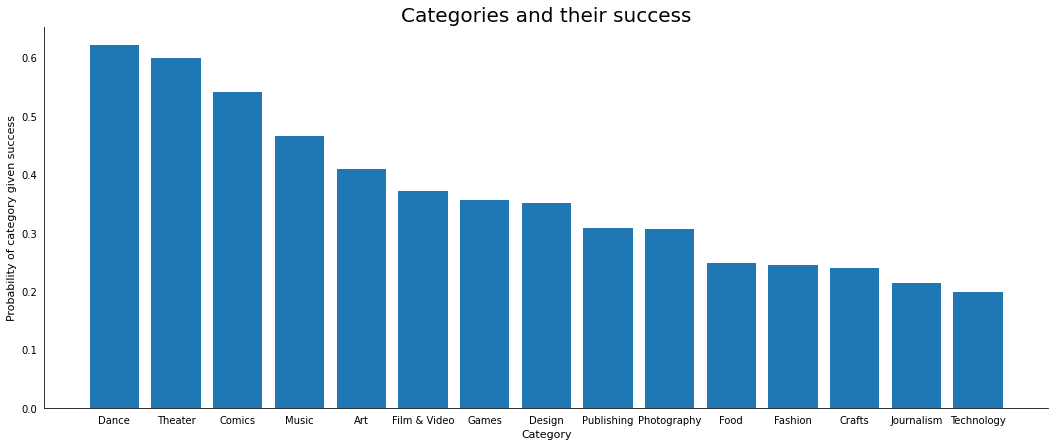

In [86]:
fig, ax = plt.subplots(figsize=(18,7))

ax.bar(df_category.category,df_category['ps_in_category'] )

ax.set_title('Categories and their success', fontsize=20)

ax.set_ylabel('Probability of category given success', fontsize=11)
ax.set_xlabel('Category', fontsize=11)


ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)




This graph shows us the probability per category. However, I want to add one more variable to give a clearer picture of the data. The popularity of projects in each category.

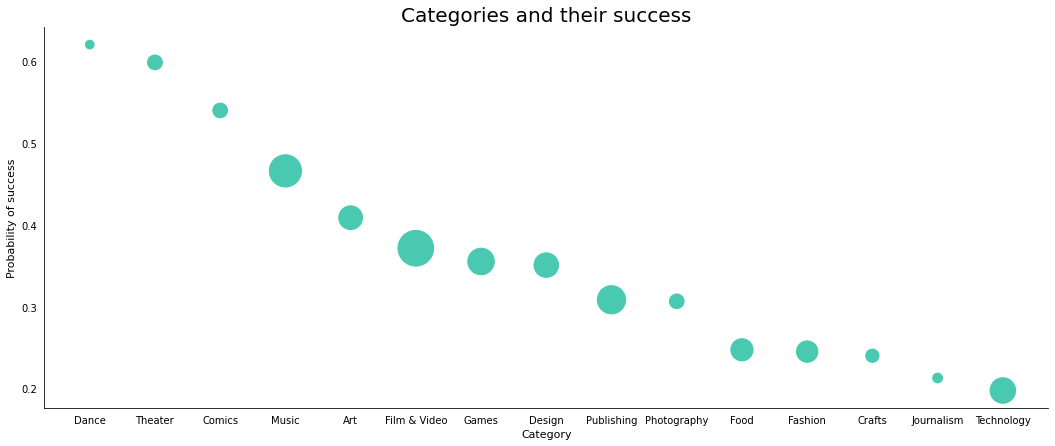

In [91]:
fig, ax = plt.subplots(figsize=(18,7))

ax.scatter(df_category.category,df_category['ps_in_category'], s=df_category['total']/50, c='#48C9B0' )

ax.set_title('Categories and their success', fontsize=20)

ax.set_ylabel('Probability of success', fontsize=11)
ax.set_xlabel('Category', fontsize=11)


ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)




In this graph I added the total amount of projects within the category as the factor of size. Now we see that the category with the highest probability of funding in Dance but this is also a category with fewer total projects. 

But this table may trick the eye a bit due to the short y axis. Lets open up a fuller picture by setting the upper limit at 1. 

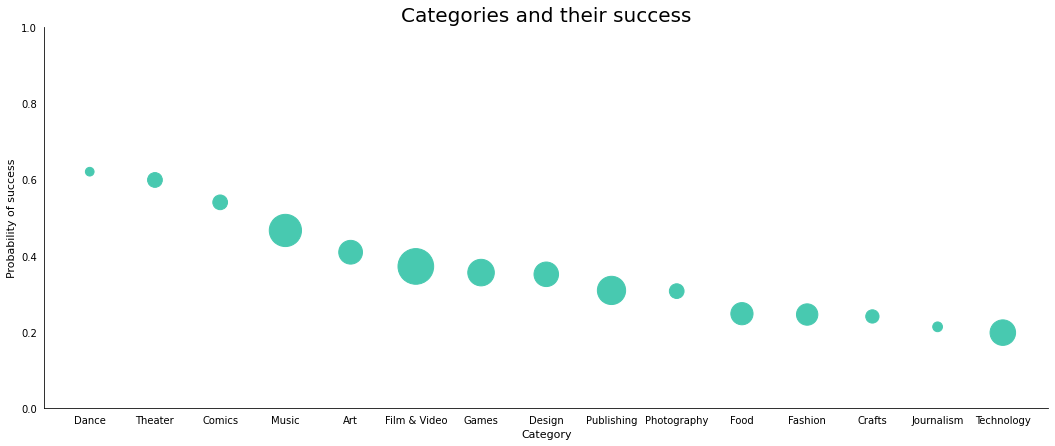

In [39]:
fig, ax = plt.subplots(figsize=(18,7))

ax.scatter(df_category.category,df_category['ps_in_category'], s=df_category['total']/50, c='#48C9B0' )


ax.set_title('Categories and their success', fontsize=20)

ax.set_ylabel('Probability of success', fontsize=11)
ax.set_xlabel('Category', fontsize=11)

ax.set_ylim(0,1)

ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)

So this graph gives us a sense of the likelyhood of funding your project within different categories. So, if I were to put up any Kickstarter project I would choose Dance and Theater. But what type of other business decisions can this data tell us?

In [89]:
df_category['prob_of_cat']=df_category.total/total

In [90]:
df_category['cat_in_success']=(df_category['ps_in_category']*df_category['prob_of_cat'])/total_prob_success
df_category.head()

,category,total,success,fail,ps_in_category,pf_in_category,prob_of_cat,cat_in_success
3,Dance,3768,2338,1430,0.620488,0.379512,0.009951,0.017453
14,Theater,10913,6534,4379,0.598735,0.401265,0.028820,0.048777
1,Comics,10819,5842,4977,0.539976,0.460024,0.028572,0.043611
10,Music,51918,24197,27721,0.466062,0.533938,0.137109,0.180634
0,Art,28153,11510,16643,0.408837,0.591163,0.074349,0.085924


In [94]:
df_category=df_category.sort_values('cat_in_success', ascending=False)

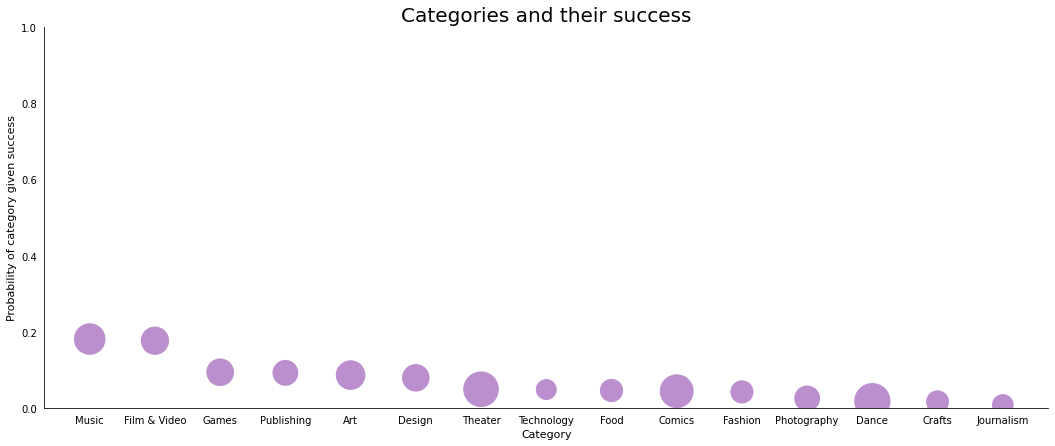

In [95]:
fig, ax = plt.subplots(figsize=(18,7))

ax.scatter(df_category.category,df_category['cat_in_success'], s=df_category['ps_in_category']*2000, c='#BB8FCE' )

ax.set_title('Categories and their success', fontsize=20)

ax.set_ylabel('Probability of category given success', fontsize=11)
ax.set_xlabel('Category', fontsize=11)


ax.set_ylim(0,1)



ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False)

### Probability of finding a specific category within the pool of successes.
This graph plots the probability that a project blongs to a certain category assuming success. Why is this interesting? Well assume you are discussing investing money into one of the Kickstarter categories, hand out a price or host an event for the winners. This graph will give you a sense for what categories will have the biggest reach and therefore more impressions. I would probably go with Music or Film&Video. 



#  3. The sweet spot

"Ok good to know! But, doesn't it also matter how much money they are asking for?"

"What I want to know is what category at what funding goal that is my best bet to invest."

Alright let's calculate that!

In [100]:
df4=kick.copy()

In [101]:
df4=df4[['name', 'main_category', 'usd_goal_real','usd_pledged_real','state']]

In [102]:
df4.rename(columns={'usd_goal_real':'goal','usd_pledged_real':'pledged' }, inplace=True)

Lets get a sense of the data.


In [103]:
print('max goal: ' + str(df4.goal.max()))
print('min goal: ' + str(df4.goal.min()))
print('mean goal: '+ str(df4.goal.mean()))
print('median goal: '+ str(df4.goal.median()))
print('standard deviation goal: '+ str(df4.goal.std()))

max goal: 166361390.71
min goal: 0.01
mean goal: 45454.40146545336
median goal: 5500.0
standard deviation goal: 1152950.0550883831


In [53]:
df4.loc[df4['goal']>=10000000.0].count()

name             188
main_category    188
goal             188
pledged          188
state            188
dtype: int64

With such a large range of numbers we need to make Bins to make it easier to work with.

In [105]:
bins = np.array([1,1000,5000,10000,50000,100000,1000000,10000000])


In [106]:
df4["bucket"] = pd.cut(df4.goal, bins)


In [107]:
df4.head()

,name,main_category,goal,pledged,state,bucket
0,The Songs of Adelaide & Abullah,Publishing,1533.95,0.0,failed,"(1000, 5000]"
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,30000.00,2421.0,failed,"(10000, 50000]"
2,Where is Hank?,Film & Video,45000.00,220.0,failed,"(10000, 50000]"
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.00,1.0,failed,"(1000, 5000]"
4,Community Film Project: The Art of Neighborhoo...,Film & Video,19500.00,1283.0,canceled,"(10000, 50000]"


Great! Now with this tables we can group it according to Category and Buckets.

In [108]:
df_goal=df4.groupby(['main_category','bucket']).name.count().reset_index()
df_goal=df_goal.rename(columns={'name':'total cat projects'})
df_goal

,main_category,bucket,total cat projects
0,Art,"(1, 1000]",8226
1,Art,"(1000, 5000]",11090
2,Art,"(5000, 10000]",4013
3,Art,"(10000, 50000]",3834
4,Art,"(50000, 100000]",506
...,...,...,...
100,Theater,"(5000, 10000]",1735
101,Theater,"(10000, 50000]",1455
102,Theater,"(50000, 100000]",210
103,Theater,"(100000, 1000000]",155


Lets see how many projects were successfull in each bucket.

In [109]:
win_goal=df4[df4['state'].isin(['successful'])][['main_category','bucket','name']
].groupby(['main_category','bucket']).count().rename(columns={'name':'success in bucket'}).reset_index()
win_goal

,main_category,bucket,success in bucket
0,Art,"(1, 1000]",4188.0
1,Art,"(1000, 5000]",4911.0
2,Art,"(5000, 10000]",1407.0
3,Art,"(10000, 50000]",906.0
4,Art,"(50000, 100000]",56.0
...,...,...,...
100,Theater,"(5000, 10000]",918.0
101,Theater,"(10000, 50000]",527.0
102,Theater,"(50000, 100000]",44.0
103,Theater,"(100000, 1000000]",9.0


Im making a fail version too to use as a way to check that my numbers make sense. 

In [61]:
fail_goal=df4[~df4['state'].isin(['successful'])][['main_category','bucket','name']
].groupby(['main_category','bucket']).count().rename(columns={'name':'fail in bucket'}).reset_index()
fail_goal

,main_category,bucket,fail in bucket
0,Art,"(1, 1000]",4038
1,Art,"(1000, 5000]",6179
2,Art,"(5000, 10000]",2606
3,Art,"(10000, 50000]",2928
4,Art,"(50000, 100000]",450
...,...,...,...
100,Theater,"(5000, 10000]",817
101,Theater,"(10000, 50000]",928
102,Theater,"(50000, 100000]",166
103,Theater,"(100000, 1000000]",146


Put it all together

In [62]:
df_goal=pd.merge(df_goal, win_goal, how='inner',sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [63]:
df_goal=pd.merge(df_goal, fail_goal, how='inner',sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [64]:
df_goal

,main_category,bucket,total cat projects,success in bucket,fail in bucket
0,Art,"(1, 1000]",8226,4188.0,4038
1,Art,"(1000, 5000]",11090,4911.0,6179
2,Art,"(5000, 10000]",4013,1407.0,2606
3,Art,"(10000, 50000]",3834,906.0,2928
4,Art,"(50000, 100000]",506,56.0,450
...,...,...,...,...,...
100,Theater,"(5000, 10000]",1735,918.0,817
101,Theater,"(10000, 50000]",1455,527.0,928
102,Theater,"(50000, 100000]",210,44.0,166
103,Theater,"(100000, 1000000]",155,9.0,146


Now, in order to make the probability calculations later on I choose to merge some columns from the previous table.

In [65]:
df_goal2=pd.merge(df_goal, df_category[['category','ps_in_category', 'pf_in_category']], how='inner', left_on='main_category', right_on='category',sort=True,
         suffixes=('_bucket', '_category'), copy=True, indicator=False,
         validate=None)

In [66]:
df_goal2.drop(columns='category', inplace=True)

In [67]:
df_goal=df_goal2.copy()

In [68]:
df_goal

,main_category,bucket,total cat projects,success in bucket,fail in bucket,ps_in_category,pf_in_category
0,Art,"(1, 1000]",8226,4188.0,4038,0.408837,0.591163
1,Art,"(1000, 5000]",11090,4911.0,6179,0.408837,0.591163
2,Art,"(5000, 10000]",4013,1407.0,2606,0.408837,0.591163
3,Art,"(10000, 50000]",3834,906.0,2928,0.408837,0.591163
4,Art,"(50000, 100000]",506,56.0,450,0.408837,0.591163
...,...,...,...,...,...,...,...
100,Theater,"(5000, 10000]",1735,918.0,817,0.598735,0.401265
101,Theater,"(10000, 50000]",1455,527.0,928,0.598735,0.401265
102,Theater,"(50000, 100000]",210,44.0,166,0.598735,0.401265
103,Theater,"(100000, 1000000]",155,9.0,146,0.598735,0.401265


Let the cacultations begin:

In [69]:
df_goal['prob_bucket']=df_goal['total cat projects']/total

In [70]:
df_goal['prob_bucket_in_success']=df_goal['success in bucket']/df_goal['success in bucket'].sum()

In [71]:
df_goal['prob_success_in_bucket']=(df_goal['prob_bucket_in_success']*total_prob_success)/df_goal['prob_bucket']

In [72]:
df_goal

,main_category,bucket,total cat projects,success in bucket,fail in bucket,ps_in_category,pf_in_category,prob_bucket,prob_bucket_in_success,prob_success_in_bucket
0,Art,"(1, 1000]",8226,4188.0,4038,0.408837,0.591163,0.021724,0.031328,0.510153
1,Art,"(1000, 5000]",11090,4911.0,6179,0.408837,0.591163,0.029287,0.036736,0.443732
2,Art,"(5000, 10000]",4013,1407.0,2606,0.408837,0.591163,0.010598,0.010525,0.351324
3,Art,"(10000, 50000]",3834,906.0,2928,0.408837,0.591163,0.010125,0.006777,0.236788
4,Art,"(50000, 100000]",506,56.0,450,0.408837,0.591163,0.001336,0.000419,0.110897
...,...,...,...,...,...,...,...,...,...,...
100,Theater,"(5000, 10000]",1735,918.0,817,0.598735,0.401265,0.004582,0.006867,0.530183
101,Theater,"(10000, 50000]",1455,527.0,928,0.598735,0.401265,0.003842,0.003942,0.362936
102,Theater,"(50000, 100000]",210,44.0,166,0.598735,0.401265,0.000555,0.000329,0.209950
103,Theater,"(100000, 1000000]",155,9.0,146,0.598735,0.401265,0.000409,0.000067,0.058183


And the same for the opposite event to have for checking the outcome later:

In [73]:
df_goal['prob_bucket_in_fail']=df_goal['fail in bucket']/df_goal['fail in bucket'].sum()

In [74]:
df_goal['prob_fail_in_bucket']=(df_goal['prob_bucket_in_fail']*(1-total_prob_success))/df_goal['prob_bucket']

In [75]:
df_goal

,main_category,bucket,total cat projects,success in bucket,fail in bucket,ps_in_category,pf_in_category,prob_bucket,prob_bucket_in_success,prob_success_in_bucket,prob_bucket_in_fail,prob_fail_in_bucket
0,Art,"(1, 1000]",8226,4188.0,4038,0.408837,0.591163,0.021724,0.031328,0.510153,0.016519,0.491391
1,Art,"(1000, 5000]",11090,4911.0,6179,0.408837,0.591163,0.029287,0.036736,0.443732,0.025277,0.557745
2,Art,"(5000, 10000]",4013,1407.0,2606,0.408837,0.591163,0.010598,0.010525,0.351324,0.010661,0.650062
3,Art,"(10000, 50000]",3834,906.0,2928,0.408837,0.591163,0.010125,0.006777,0.236788,0.011978,0.764484
4,Art,"(50000, 100000]",506,56.0,450,0.408837,0.591163,0.001336,0.000419,0.110897,0.001841,0.890248
...,...,...,...,...,...,...,...,...,...,...,...,...
100,Theater,"(5000, 10000]",1735,918.0,817,0.598735,0.401265,0.004582,0.006867,0.530183,0.003342,0.471381
101,Theater,"(10000, 50000]",1455,527.0,928,0.598735,0.401265,0.003842,0.003942,0.362936,0.003796,0.638461
102,Theater,"(50000, 100000]",210,44.0,166,0.598735,0.401265,0.000555,0.000329,0.209950,0.000679,0.791294
103,Theater,"(100000, 1000000]",155,9.0,146,0.598735,0.401265,0.000409,0.000067,0.058183,0.000597,0.942910


So, now lets take out the parts I am intersted.

In [76]:
tablewin = df_goal[['main_category','bucket','prob_success_in_bucket']]

In [83]:
tablewin.to_csv(r'tablewin.csv')


In [77]:
tablewin_pivot = pd.pivot_table(tablewin , index=tablewin['main_category'], columns=tablewin['bucket'])

In [78]:
tablewin_pivot

prob_success_in_bucket                             \
bucket                     (1, 1000] (1000, 5000] (5000, 10000]   
main_category                                                     
Art                         0.510153     0.443732      0.351324   
Comics                      0.710097     0.553837      0.460728   
Crafts                      0.375044     0.197390      0.158172   
Dance                       0.654595     0.685208      0.592585   
Design                      0.538272     0.430943      0.364049   
Fashion                     0.336104     0.235997      0.247207   
Film & Video                0.508390     0.446755      0.387788   
Food                        0.322430     0.311723      0.296582   
Games                       0.529920     0.437741      0.358293   
Journalism                  0.299958     0.242123      0.173785   
Music                       0.536788     0.495196      0.461166   
Photography                 0.418857     0.298498      0.253986   
Publishing                  0.463472     0.335006      0.267470   
Technology                  0.393061     0.255239      0.206137   
Theater                     0.718946     0.676511      0.530183   

                                                                \
bucket        (10000, 50000] (50000, 100000] (100000, 1000000]   
main_category                                                    
Art                 0.236788        0.110897          0.028190   
Comics              0.403849        0.202023          0.080163   
Crafts              0.115418        0.032586               NaN   
Dance               0.418098        0.022774          0.045547   
Design              0.309495        0.177576          0.095065   
Fashion             0.231427        0.061759          0.022554   
Film & Video        0.302010        0.162004          0.060250   
Food                0.222417        0.060669          0.015128   
Games               0.275886        0.158569          0.109647   
Journalism          0.172466        0.063286          0.041751   
Music               0.365312        0.125254          0.044425   
Photography         0.285953        0.074686          0.051386   
Publishing          0.205649        0.075678          0.033401   
Technology          0.186513        0.152952          0.062124   
Theater             0.362936        0.209950          0.058183   

                                   
bucket        (1000000, 10000000]  
main_category                      
Art                           NaN  
Comics                        NaN  
Crafts                        NaN  
Dance                         NaN  
Design                        NaN  
Fashion                       NaN  
Film & Video             0.014439  
Food                          NaN  
Games                    0.071574  
Journalism                    NaN  
Music                         NaN  
Photography                   NaN  
Publishing                    NaN  
Technology                    NaN  
Theater                       NaN

There it is: What would you invest in?


And the same for the opposite, just to check.

In [79]:
tablefail = df_goal[['main_category','bucket','prob_fail_in_bucket']]

In [80]:
tablefail_pivot = pd.pivot_table(tablefail , index=tablefail ['main_category'], columns=tablefail['bucket'])

In [81]:
tablefail_pivot

prob_fail_in_bucket                                            \
bucket                  (1, 1000] (1000, 5000] (5000, 10000] (10000, 50000]   
main_category                                                                 
Art                      0.491391     0.557745      0.650062       0.764484   
Comics                   0.291647     0.447750      0.540766       0.597589   
Crafts                   0.626366     0.803842      0.843021       0.885733   
Dance                    0.347093     0.316511      0.409041       0.583354   
Design                   0.463300     0.570521      0.637349       0.691848   
Fashion                  0.665266     0.765274      0.754074       0.769839   
Film & Video             0.493153     0.554726      0.613634       0.699327   
Food                     0.678926     0.689623      0.704748       0.778840   
Games                    0.471643     0.563731      0.643099       0.725424   
Journalism               0.701376     0.759154      0.827424       0.828741   
Music                    0.464782     0.506333      0.540329       0.636087   
Photography              0.582596     0.702835      0.747302       0.715367   
Publishing               0.538026     0.666364      0.733832       0.795591   
Technology               0.608366     0.746051      0.795104       0.814708   
Theater                  0.282806     0.325199      0.471381       0.638461   

                                                                     
bucket        (50000, 100000] (100000, 1000000] (1000000, 10000000]  
main_category                                                        
Art                  0.890248          0.972873            1.001035  
Comics               0.799213          0.920952            1.001035  
Crafts               0.968481          1.001035            1.001035  
Dance                0.978284          0.955533            1.001035  
Design               0.823636          0.906065            1.001035  
Fashion              0.939338          0.978504            1.001035  
Film & Video         0.839193          0.940845            0.986611  
Food                 0.940427          0.985922            1.001035  
Games                0.842624          0.891497            0.929532  
Journalism           0.937812          0.959325            1.001035  
Music                0.875906          0.956654            1.001035  
Photography          0.926424          0.949700            1.001035  
Publishing           0.925432          0.967667            1.001035  
Technology           0.848235          0.938973            1.001035  
Theater              0.791294          0.942910            1.001035

This is my first full individual project. I realize many steps could be simplified, if you know them, please reach out. It is time to learn by doing!

Thanks for reading!